In [177]:
# 운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련

from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [178]:
#텐서플로에서 패션 MNIST 데이터셋 import

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [179]:
fashion_mnist.load_data() #네 개의 numpy 배열반환 (train_images, train_labels, test_images, tset_labels)
#이미지는 28x28 크기의 넘파이 배열, 픽셀 값은 0과 255 사이, 레이블(label)은 0에서 9까지의 정수 배열

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [180]:
#데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [181]:
#훈련 세트에 60,000개의 이미지가 있다는 것을 보여줌, 각 이미지는 28x28 픽셀로 표현 (60000, 28, 28)
train_images.shape

(60000, 28, 28)

In [182]:
#훈련 세트에 레이블 60000
len(train_labels)

60000

In [183]:
#각 레이블은 0과 9사이의 정수
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [184]:
#테스트 세트에는 10,000개의 이미지, 28x28 픽셀로 표현 (10000, 28, 28)
test_images.shape

(10000, 28, 28)

In [185]:
#테스트 세트는 10,000개의 이미지에 대한 레이블을 가지고 있음
len(test_labels)

10000

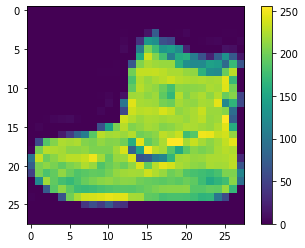

In [186]:
#데이터 전처리, 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있음
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [187]:
#신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정
#값을 255로 나누어야함, 훈련 세트와 테스트 세트를 동일한 방식으로 전처리해야함
train_images = train_images / 255.0

test_images = test_images / 255.0

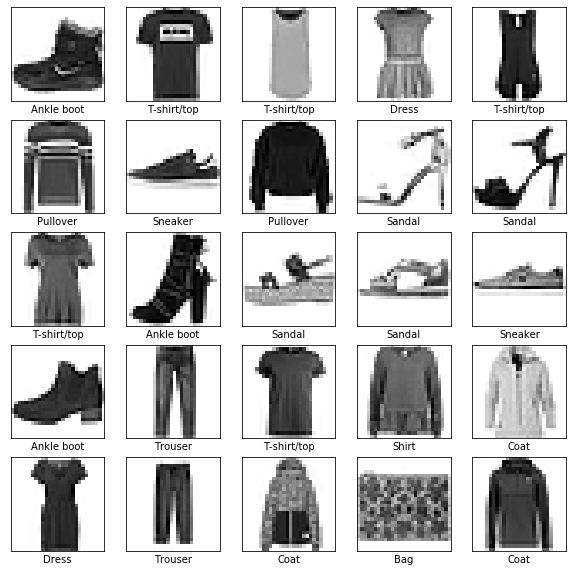

In [188]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [189]:
#모델에 convolution layer를 추가
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation='softmax')
])

In [190]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [191]:
#원래 데이터 차원늘리기(convolution layer 추가했기때문)
train_images = np.expand_dims(train_images, 3)
test_images = np.expand_dims(test_images, 3)
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 374us/sample - loss: 0.3775 - acc: 0.8649
Epoch 2/5
60000/60000 [==============================] - 23s 385us/sample - loss: 0.2458 - acc: 0.9108
Epoch 3/5
60000/60000 [==============================] - 23s 389us/sample - loss: 0.2008 - acc: 0.9257
Epoch 4/5
60000/60000 [==============================] - 22s 361us/sample - loss: 0.1651 - acc: 0.9384
Epoch 5/5
60000/60000 [==============================] - 23s 378us/sample - loss: 0.1364 - acc: 0.9488


In [192]:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 1s - loss: 0.2505 - acc: 0.9151

테스트 정확도: 0.9151


In [193]:
predictions = model.predict(test_images)

In [194]:
predictions[0]

array([3.1575496e-08, 2.4034572e-08, 1.7962161e-07, 7.8349650e-08,
       5.4894510e-08, 2.0795557e-07, 9.5481096e-07, 7.7365592e-05,
       1.3503282e-07, 9.9992096e-01], dtype=float32)

In [195]:
np.argmax(predictions[0])

9

In [196]:
test_labels[0]

9

In [197]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [200]:
# test_images = test_images.shape
test_images=np.squeeze(test_images, axis=3)

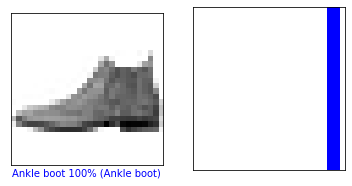

In [201]:
# np.squeeze(test_images, axis=3)
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

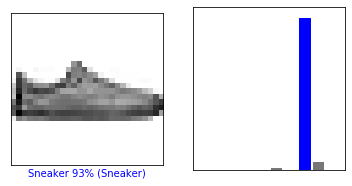

In [202]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

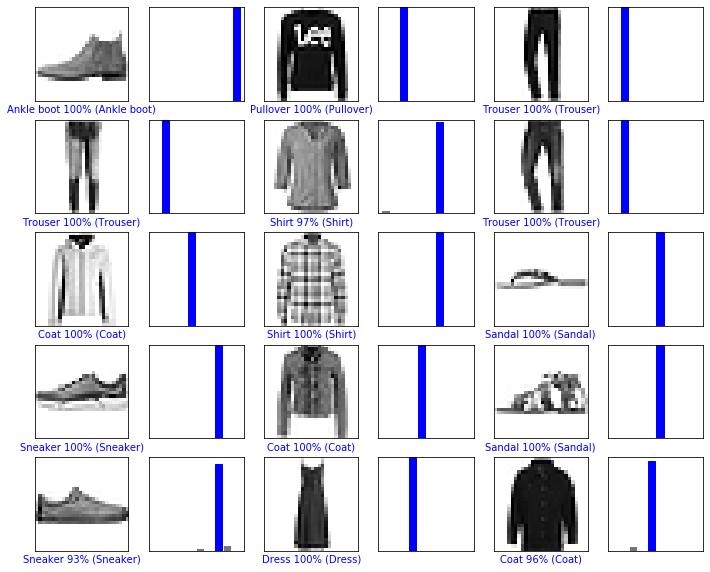

In [203]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [220]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [221]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [222]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.1575436e-08 2.4034572e-08 1.7962144e-07 7.8349800e-08 5.4894510e-08
  2.0795537e-07 9.5481187e-07 7.7365592e-05 1.3503282e-07 9.9992096e-01]]


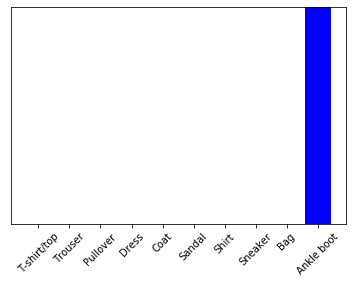

In [223]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [224]:
np.argmax(predictions_single[0])

9